In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import sklearn.model_selection
from sklearn import datasets, linear_model
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.decomposition import PCA
import math

In [4]:
url0 = "https://raw.githubusercontent.com/gyandevgupta/DS203_Assignment/master/0.csv"
url1 = "https://raw.githubusercontent.com/gyandevgupta/DS203_Assignment/master/1.csv"
url2 = "https://raw.githubusercontent.com/gyandevgupta/DS203_Assignment/master/2.csv"
url3 = "https://raw.githubusercontent.com/gyandevgupta/DS203_Assignment/master/3.csv"

In [5]:
df0 = pd.read_csv(url0, header=None)
df1 = pd.read_csv(url1, header=None)
df2 = pd.read_csv(url2, header=None)
df3 = pd.read_csv(url3, header=None)
df = pd.concat([df0,df1,df2,df3], ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,4.0,13.0,-18.0,-30.0,-119.0,-45.0,17.0,6.0,-1.0,-9.0,27.0,20.0,91.0,71.0,-26.0,-1.0,0.0,1.0,13.0,20.0,-62.0,-19.0,29.0,2.0,2.0,0.0,-23.0,-1.0,-80.0,4.0,-7.0,-6.0,-12.0,-27.0,-11.0,-16.0,-67.0,-8.0,-27.0,1.0,1.0,13.0,-8.0,-11.0,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11673,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,2.0,5.0,-10.0,-17.0,-3.0,-2.0,12.0,2.0,2.0,2.0,-4.0,-28.0,1.0,-6.0,-5.0,-1.0,1.0,0.0,11.0,9.0,-4.0,14.0,2.0,-2.0,-2.0,-8.0,-17.0,1.0,-2.0,6.0,-14.0,-3.0,-4.0,-2.0,27.0,18.0,-6.0,-17.0,-4.0,1.0,-2.0,1.0,13.0,-12.0,-3.0,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
11674,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,9.0,7.0,5.0,50.0,31.0,18.0,-3.0,-3.0,1.0,-2.0,17.0,-6.0,-10.0,-18.0,-11.0,-5.0,-2.0,-2.0,10.0,21.0,-2.0,15.0,5.0,-2.0,-2.0,-6.0,-6.0,-50.0,-16.0,7.0,-12.0,-2.0,-3.0,1.0,21.0,48.0,12.0,-12.0,-1.0,3.0,2.0,5.0,-12.0,-8.0,5.0,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
11675,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,4.0,0.0,-3.0,33.0,-2.0,-1.0,-1.0,2.0,-3.0,0.0,-38.0,-25.0,0.0,3.0,2.0,-1.0,0.0,-3.0,14.0,0.0,-1.0,-3.0,-3.0,-4.0,-3.0,-6.0,-2.0,13.0,-5.0,-19.0,-6.0,-5.0,-4.0,1.0,41.0,-10.0,-4.0,-9.0,3.0,3.0,2.0,3.0,1.0,50.0,12.0,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
11676,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,-1.0,-1.0,-5.0,12.0,1.0,-19.0,0.0,-4.0,-4.0,0.0,25.0,0.0,3.0,-5.0,1.0,1.0,-2.0,-4.0,-31.0,-17.0,-7.0,5.0,3.0,-5.0,-3.0,-1.0,4.0,-48.0,-13.0,-5.0,-14.0,6.0,5.0,6.0,-3.0,79.0,15.0,-6.0,-3.0,-1.0,-3.0,-1.0,-1.0,27.0,-2.0,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3


a. Decide whether the variable to be predicted is discrete or continuous. Also, decide if this is a supervised or an unsupervised problem. For the former, find the target variable. \\

The predicted variable is in the column no.64 and the given problem is supervised learning and it's a classification problem. There are four different values in the column no.64 and it's a discrete variable

In [6]:
df.nunique(dropna=True)

0     191
1     154
2      61
3     102
4     161
     ... 
60    165
61    215
62    249
63    184
64      4
Length: 65, dtype: int64

b. Decide on a measure of performance, e.g. accuracy, area under ROC curve, F1-score, 
sensitivity, specificity, variance explained, Davies-Bouldin criteria, reconstruction error, root 
mean square error (RMSE), RMSE normalized by standard deviation of the target variable,
mean absolute error etc. \\

Our problem is a classification so we would consider f1 score

c. Decide which variables might be relevant for predicting the target variable. \\

All are relevant \\

d. Decide which variables are usable. \\

All are usable there are no Nan values \\

e. Convert categorical variables into one-hot bit dummy variables, and standardize (or normalize) 
the continuous variables. Also, figure out a way to deal with a few missing variables. \\

There arent any categorical variables

In [7]:
#Divide the data in X and Y 
X = df.drop([64], axis=1)
Y = df[64]

In [8]:
#Normalize the X data 
Xmean = X.mean()
Xstd = X.std()
X = (X - Xmean)/Xstd
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,1.428383,0.401707,1.150129,1.173089,-0.047108,-0.482191,-4.293642,-4.240288,-0.459839,0.224150,0.943360,1.860700,-1.008333,-1.148092,-4.686935,-2.870792,0.977584,0.557191,-0.048303,-1.118539,1.500693,0.786045,3.699176,4.773180,-1.435712,-0.023533,0.149162,0.229477,0.723808,0.781602,-2.388916,-1.174689,1.688604,0.227582,0.553134,0.089151,-1.280869,-0.030326,-3.132991,0.311935,-0.340092,-0.424552,-2.255259,-3.587422,-0.599358,-0.592133,-2.638387,-0.472058,-1.449685,0.152049,0.365656,1.863783,-0.445910,-0.410036,0.894415,-1.785561,3.396802,0.394881,1.764414,0.772620,0.232418,-0.259292,-2.278357,1.069478
1,-2.503385,-0.448136,-0.853901,-0.842586,0.737188,-0.017246,1.445703,-0.606024,0.588504,-0.282553,0.144161,1.047348,-1.732152,-1.263551,-1.859199,-3.325798,1.912226,0.892700,1.149322,-1.118539,1.278222,2.459448,3.097713,3.306596,-1.492252,-0.525183,-1.262434,-0.317260,0.004882,0.169092,-4.318924,-0.075903,-0.343667,0.639183,2.348213,1.589301,0.114148,0.083536,3.089157,0.246997,0.428150,-0.095357,0.158960,-0.728717,1.169860,-0.095310,0.057637,-0.472058,-2.163895,-0.266022,-0.040791,0.913003,-0.108556,-0.062986,-4.087200,-1.587659,2.627760,0.561475,1.361980,0.772620,0.736861,0.836552,4.451721,1.005087
2,-0.995309,-0.618105,-1.455110,-0.976964,-1.167531,-0.210973,-3.097945,0.821723,0.036745,0.477502,0.943360,2.267376,1.330160,0.352872,1.366811,2.264267,-0.012038,-0.281583,-0.447511,-0.712646,-0.390310,-0.420362,-3.357980,-0.759842,-0.531060,-0.107141,-0.455808,-0.180576,-0.437533,-1.132493,-0.577071,-1.368593,-1.133994,-0.513299,-1.441399,-1.547376,-0.778663,-0.675543,-2.973448,-2.805104,1.525639,0.645330,0.963699,-0.456459,-0.544070,0.898334,5.168010,4.494212,-1.339806,-0.934936,-1.666579,0.233874,1.015956,-1.258380,-4.996542,-5.413770,0.430496,0.644772,0.355895,-0.987846,0.400566,0.836552,4.570487,3.129994
3,0.135747,0.316723,0.148114,0.366819,0.008913,0.873898,4.275519,-0.865614,-0.846070,-0.113652,-0.455238,-0.443799,0.996089,0.814707,-0.305935,0.184243,-0.396891,0.053926,0.750114,0.775626,-0.779634,-0.576027,0.571573,-0.826505,0.656294,-0.274358,-0.859121,-1.000682,-1.654177,-1.017647,-4.988518,-1.368593,-0.117859,-0.348659,-1.441399,0.089151,1.397564,-0.333958,-1.058941,0.182059,-1.163209,0.727629,1.768439,-0.184202,0.119387,0.477946,2.190312,1.333859,1.571974,-0.684093,-0.853685,-0.581080,-0.389684,-0.255792,-2.070832,-2.445235,-0.558272,0.394881,1.563197,1.585143,1.857844,1.541023,4.768431,2.808038
4,0.351187,0.061770,0.148114,-0.170694,-0.775383,0.408953,-1.981961,0.367440,0.422976,0.055249,0.943360,1.860700,0.717697,-0.609284,-1.739717,-0.400764,-4.575294,-0.617093,-0.447511,-0.442051,-2.003224,-1.004107,-5.082171,-3.626347,4.274899,0.310900,-1.464091,-1.547419,0.779110,0.475347,3.479885,3.672897,-0.117859,0.227582,0.154227,-0.865490,0.225750,0.576937,-0.460658,0.052182,-0.779087,0.151538,0.762514,1.177086,-0.101765,-0.209962,-2.155517,-1.504010,0.088614,0.486507,1.178550,0.369700,0.622377,0.476869,2.436344,2.568290,-1.876630,-0.604686,0.557112,0.908041,-0.720418,-0.924626,-4.376558,-4.403767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11673,-0.133552,-0.023215,-0.052289,-0.036316,-1.559679,0.796407,0.250006,0.042952,-0.239135,0.055249,0.543761,0.776230,-0.562906,-0.647771,-0.066971,-0.075760,0.702689,0.221681,0.550509,0.369734,-0.223457,-1.081940,0.090403,-0.359864,-0.248357,-0.023533,0.350818,0.092793,0.613204,0.360502,-0.104416,0.958248,0.164401,-0.101698,-0.244680,-1.001867,-0.946065,0.045582,-0.021917,0.441812,-0.724213,-0.177656,-0.645780,-0.184202,1.501589,0.707249,-0.183798,-1.052531,-0.186082,0.152049,-0.244014,0.233874,

In [9]:
df.isnull().sum().sum()

0

So there are no NAN values

f. If there are too many variables, then consider dimension reduction techniques such as PCA. \\

Here there are large no. of variable we should apply PCA here


#Q5 and Q.4 part f
Compress the 64 input dimensions in the same dataset https://www.kaggle.com/kyr7plus/emg-4 to an 
appropriate number of dimensions using PCA such that the RMSE reconstruction error is less 1% of the 
standard deviation of the L2 norm of the 64 variable input. Plot a graph of dimensions retained versus 
normalized RMSE

So 1% of 2.926452713715817 is 0.02926452713715817 > RMSE

In [10]:
rmse_list = []
rmse_y = []
dimension_x = []
noOfElements = []
for component in range(1,65):
  pca = PCA(n_components=component)
  pca = pca.fit(X)
  X_pca = pca.transform(X)
  X_new = pca.inverse_transform(X_pca)
  rmse = mean_squared_error(X,X_new, squared=False)
  rmse_y.append(rmse)
  l2_norm  = np.linalg.norm(X, axis = 1)
  l2_std = l2_norm.std()
  l2_std
  dimension_x.append(component)
  if rmse<0.01*l2_std:
    noOfElements.append(component)
print(noOfElements)

[64]


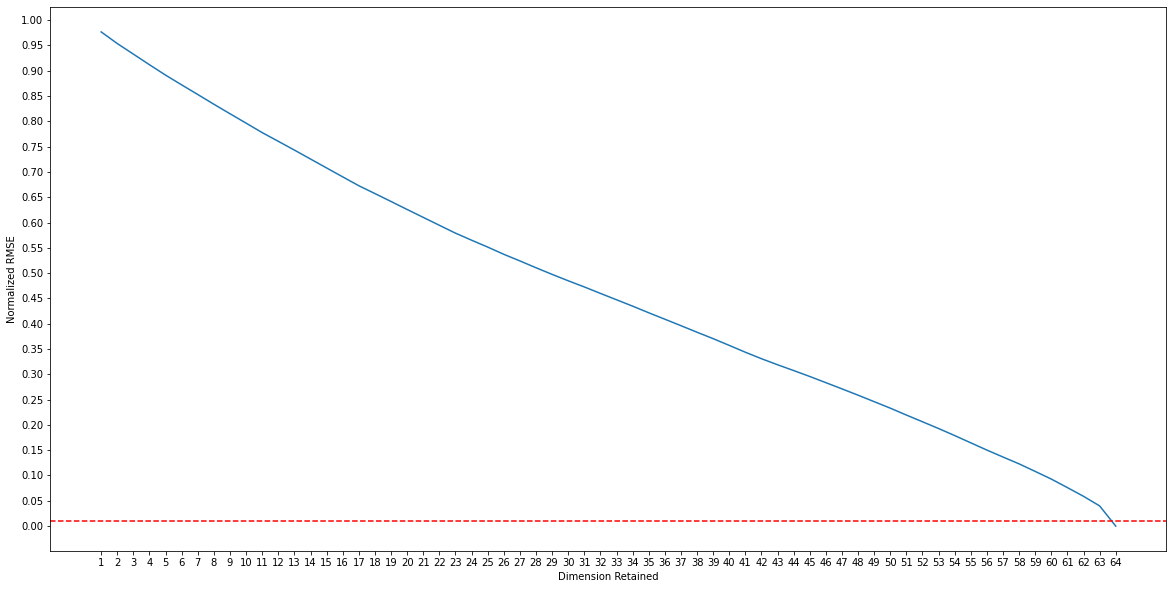

In [11]:
plt.figure(figsize=(20,10))
plt.plot(dimension_x,rmse_y)
plt.xlabel("Dimension Retained")
plt.xticks(np.arange(min(dimension_x),max(dimension_x)+1,step=1))
plt.ylabel("Normalized RMSE")
plt.yticks(np.arange(min(rmse_y),max(rmse_y)+0.05,step=0.05))
plt.axhline(y = 0.01, color = 'r', linestyle = 'dashed')    
plt.show()

We can easily notice from both the calculations and the plot that RMSE condition is valid only for 64 components which is the original data so we have to stick with the original data. PCA doesnt work here 

In [12]:
X = np.array(X)
Y = np.array(Y)
X_train, X_rem, y_train, y_rem = sklearn.model_selection.train_test_split(X, Y, test_size=0.7)
X_validate, X_test, y_validate, y_test = sklearn.model_selection.train_test_split(X_rem, y_rem, test_size=0.5)

##Support Vector Machine

In [13]:
param_grid_SVC = {
    'C': [0.001,0.01,0.1, 1, 10, 100, 1000],
    'kernel': ['rbf']
}

gscv_svc = GridSearchCV(estimator = SVC(),param_grid = param_grid_SVC, cv=5)
gscv_svc_result = gscv_svc.fit(X_train,y_train.ravel())

In [14]:
best_param_svc = gscv_svc_result.best_params_
svc = SVC(kernel=best_param_svc['kernel'], C = best_param_svc['C']).fit(X_train,y_train.ravel())
y_predict = svc.predict(X_test)
f1score = f1_score(y_test,y_predict,average='micro')
print("F1 Score : " + str(f1score))

F1 Score : 0.8759784735812133


## Random Forest

In [16]:
param_grid_RF = {
  'n_estimators': [10, 50, 100, 200, 400, 700, 1000],
  'max_depth': np.linspace(60,131,10),
}

gscv_rf = GridSearchCV(estimator = RandomForestClassifier(),param_grid = param_grid_RF, cv=5)
gscv_rf_result = gscv_rf.fit(X_train,y_train.ravel())

In [20]:
best_param_rf = gscv_rf_result.best_params_
rf = RandomForestClassifier(n_estimators=best_param_rf['n_estimators'],max_depth = best_param_rf['max_depth']).fit(X_train,y_train.ravel())
y_predict = rf.predict(X_test)
f1score = f1_score(y_test,y_predict,average='micro')
print("F1 Score : " + str(f1score))

F1 Score : 0.9168297455968689


On comparing the f1score we get Random forest is better than SVM as it is higher